In [ ]:
# https://www.kaggle.com/code/sreshta140/getting-started-with-demand-forecasting

### Your client is a meal delivery company which operates in multiple cities. 
### They have various fulfillment centers in these cities for dispatching meal orders to their customers. 
### The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

### The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. 
### Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. 
### Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [105]:
center_info = pd.read_csv('E:/Kaggle_Practice/Meal_Delivery_Company/fulfilment_center_info.csv')
meal_info = pd.read_csv('E:/Kaggle_Practice/Meal_Delivery_Company/meal_info.csv')
test_data = pd.read_csv('E:/Kaggle_Practice/Meal_Delivery_Company/test.csv')
train_data = pd.read_csv('E:/Kaggle_Practice/Meal_Delivery_Company/train.csv')

In [3]:
center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [4]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [8]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [9]:
test_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [5]:
train_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


#### train_data,center_info, meal_info 병합하기

In [106]:
merge1 = pd.merge(train_data, center_info, how='inner', on='center_id')

In [107]:
df = pd.merge(merge1, meal_info, how='inner', on='meal_id')

In [5]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [6]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [108]:
df = df.sort_values(by=['week'])
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
299714,1102584,1,11,1525,242.50,282.33,0,1,460,679,56,TYPE_A,3.7,Other Snacks,Thai
299851,1026447,1,83,1525,244.50,281.33,0,0,94,659,77,TYPE_A,5.3,Other Snacks,Thai
299996,1177435,1,32,1525,249.29,251.29,0,0,82,526,34,TYPE_A,3.8,Other Snacks,Thai
31140,1108310,1,43,2539,133.86,135.86,0,0,675,590,56,TYPE_A,5.1,Beverages,Thai


In [109]:
for i in df.columns:
    print(i)
    print('Unique Values: '+str(len(df.groupby([i]).count())))
    print(df[i].value_counts())

id
Unique Values: 456548
1379560    1
1119360    1
1248454    1
1044701    1
1269689    1
          ..
1083729    1
1117234    1
1490280    1
1203356    1
1443704    1
Name: id, Length: 456548, dtype: int64
week
Unique Values: 145
122    3359
105    3348
106    3347
140    3332
123    3331
       ... 
13     2838
12     2831
14     2830
7      2795
8      2786
Name: week, Length: 145, dtype: int64
center_id
Unique Values: 77
13     7046
10     7015
52     6993
43     6970
67     6915
       ... 
139    4627
57     4501
162    4366
41     4083
91     3432
Name: center_id, Length: 77, dtype: int64
meal_id
Unique Values: 51
2290    11138
1062    11137
1727    11136
1109    11134
1754    11132
2707    11123
1778    11121
1993    11116
1962    11114
1971    11102
1885    11092
2581    11072
2826    11057
2322    11002
1558    10952
1207    10806
2640    10747
1230    10746
1878    10527
2631    10458
2539    10451
1543    10236
2760    10209
1248     9939
2664     9853
2704     9811
1445   

In [9]:
df.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [110]:
num_cols=['center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders',
 'city_code',
 'region_code',
 'op_area']

In [111]:
colors=['#b84949', '#ff6f00', '#ffbb00', '#9dff00', '#329906', '#439c55', '#67c79e', '#00a1db', '#002254', '#5313c2', '#c40fdb', '#e354aa']

In [112]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
299714,1102584,1,11,1525,242.50,282.33,0,1,460,679,56,TYPE_A,3.7,Other Snacks,Thai
299851,1026447,1,83,1525,244.50,281.33,0,0,94,659,77,TYPE_A,5.3,Other Snacks,Thai
299996,1177435,1,32,1525,249.29,251.29,0,0,82,526,34,TYPE_A,3.8,Other Snacks,Thai
31140,1108310,1,43,2539,133.86,135.86,0,0,675,590,56,TYPE_A,5.1,Beverages,Thai


- #### center_id : fulfillment center(주문 처리 센터) id
- #### num_orders : 주문 처리 센터(id)별 주문 건수 
- #### homepage_featured : Meal featured at homepage (0: NO, 1: YES)
- #### emailer_for_promotion : Emailer sent for promotion of meal (0: NO, 1: YES)
- #### base_price : Base price of the meal
- #### checkout_price : Final price including discount, taxes & delivery charges

### 주(week)별 주문건수 확인하기

In [113]:
ts_tot_orders = df.groupby(['week'])['num_orders'].sum()
ts_tot_orders = pd.DataFrame(ts_tot_orders)
ts_tot_orders

,num_orders
week,
1,792261
2,787084
3,695262
4,743529
5,1198675
...,...
141,776240
142,739661
143,759926


In [114]:
import plotly.graph_objs as go
import plotly.offline as pyoff

plot_data = [
    go.Scatter(
        x=ts_tot_orders.index,
        y=ts_tot_orders['num_orders'],
        name='Time Series for num_orders',
        marker = dict(color = 'Blue')
        #x_axis="OTI",
        #y_axis="time",http://localhost:8888/notebooks/Kaggle_for_timepass/hackathon/Sigma-thon-master/Sigma-thon-master/eda1.ipynb#
    )
]
plot_layout = go.Layout(
        title='Total orders per week',
        yaxis_title='Total orders',
        xaxis_title='Week',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

### 주문 처리 센터(center_id)별 주문건수 확인하기

In [115]:
center_id = df.groupby(['center_id'])['num_orders'].sum()
center_id = pd.DataFrame(center_id)

In [116]:
center_id=center_id.reset_index()

In [117]:
import plotly.express as px
fig = px.bar(center_id, x="center_id", y="num_orders", color='center_id')
# fig.update_layout({
# 'plot_bgcolor': 'rgba(1, 1, 1, 1)',
# 'paper_bgcolor': 'rgba(1, 1, 1, 1)',
# })

fig.show()

### 상품별(meal_id) 주문건수 확인하기

In [118]:
meal_id = df.groupby(['meal_id'])['num_orders'].sum()
meal_id = pd.DataFrame(meal_id)

In [119]:
meal_id=meal_id.reset_index()

In [120]:
import plotly.express as px
fig = px.bar(meal_id, x="meal_id", y="num_orders")
fig.update_layout({
'plot_bgcolor': 'rgba(1, 1, 1, 1)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show()

### object 변수 확인하기

In [121]:
cat_var = ['center_type',
 'category',
 'cuisine']

In [122]:
import plotly.graph_objs as go
import plotly.offline as pyoff
for i in cat_var:
    grp=df.groupby([i])
    grp=pd.DataFrame(grp)
    lis=grp[0]
    x=0
    for j in lis:
        print(i)
        print(j)
        data = df[df[i]==j]
        data = pd.DataFrame(data)
        tot_orders = data.groupby(['week'])['num_orders'].sum()
        tot_orders = pd.DataFrame(tot_orders)
        plot_data = [
            go.Scatter(
                x=tot_orders.index,
                y=tot_orders['num_orders'],
                name='Time Series for num_orders for '+str(j),
                marker = dict(color = colors[x%12])
                #x_axis="OTI",
                #y_axis="time",
            )
        ]
        plot_layout = go.Layout(
                title='Total orders per week for '+str(j),
                yaxis_title='Total orders',
                xaxis_title='Week',
                plot_bgcolor='rgba(0,0,0,0)'
            )
        fig = go.Figure(data=plot_data, layout=plot_layout)
        x+=1
        pyoff.iplot(fig)

center_type
TYPE_A


center_type
TYPE_B


center_type
TYPE_C


category
Beverages


category
Biryani


category
Desert


category
Extras


category
Fish


category
Other Snacks


category
Pasta


category
Pizza


category
Rice Bowl


category
Salad


category
Sandwich


category
Seafood


category
Soup


category
Starters


cuisine
Continental


cuisine
Indian


cuisine
Italian


cuisine
Thai


In [123]:
import plotly.graph_objs as go
import plotly.offline as pyoff
for i in cat_var:
    grp=df.groupby([i])
    grp=pd.DataFrame(grp)
    lis=grp[0]
    x=0
    plot_data=[]
    for j in lis:
        print(i)
        print(j)
        data = df[df[i]==j]
        data = pd.DataFrame(data)
        tot_orders = data.groupby(['week'])['num_orders'].sum()
        tot_orders = pd.DataFrame(tot_orders)
       
        plot_data.append(go.Scatter(
                x=tot_orders.index,
                y=tot_orders['num_orders'],
                name=str(j),
                #marker = dict(color = colors[x%12])
                #x_axis="OTI",
                #y_axis="time",
            ))
        
        x+=1
    plot_layout = go.Layout(
            title='Total orders per week for '+str(i),
            yaxis_title='Total orders',
            xaxis_title='Week',
            plot_bgcolor='rgba(0,0,0,0)'
        )
    fig = go.Figure(data=plot_data, layout=plot_layout)
    pyoff.iplot(fig)

center_type
TYPE_A
center_type
TYPE_B
center_type
TYPE_C


category
Beverages
category
Biryani
category
Desert
category
Extras
category
Fish
category
Other Snacks
category
Pasta
category
Pizza
category
Rice Bowl
category
Salad
category
Sandwich
category
Seafood
category
Soup
category
Starters


cuisine
Continental
cuisine
Indian
cuisine
Italian
cuisine
Thai


#### center type_A가 음식이 가장 많이 팔리고, Beverages랑, Italian 음식이 많이 팔린다.

### 상관관계 살펴보기

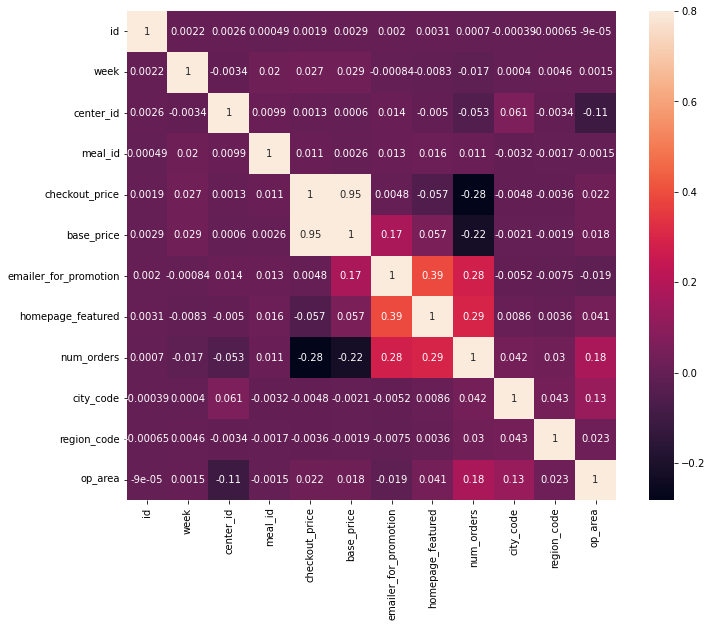

In [33]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

#### Checkout_price, base_price show negative correlation while emailer_promotion and homepage_feature show positive 
#### correlation with num_orders(Target)

### Analysis of 'num_orders' with categorical data

In [98]:
center_type = df.groupby(['center_type'])['num_orders'].sum()
center_type = pd.DataFrame(center_type)

In [99]:
center_type

,num_orders
center_type,
TYPE_A,68978517
TYPE_B,29996073
TYPE_C,20582895


In [100]:
# reset_index()하면 위의 결과와 다르게 index가 붙는다

center_type=center_type.reset_index()
center_type

,center_type,num_orders
0,TYPE_A,68978517
1,TYPE_B,29996073
2,TYPE_C,20582895


In [101]:
import plotly.express as px
fig = px.bar(center_type, x="center_type", y="num_orders", color='center_type')
# fig.update_layout({
# 'plot_bgcolor': 'rgba(1, 1, 1, 1)',
# 'paper_bgcolor': 'rgba(1, 1, 1, 1)',
# })

fig.show()

In [95]:
category = df.groupby(['category'])['num_orders'].sum()
category = pd.DataFrame(category)

In [96]:
category = category.reset_index()

In [97]:
import plotly.express as px
fig = px.bar(category, x="category", y="num_orders", color='category')
# fig.update_layout({
# 'plot_bgcolor': 'rgba(1, 1, 1, 1)',
# 'paper_bgcolor': 'rgba(1, 1, 1, 1)',
# })
fig.show()

In [92]:
cuisine = df.groupby(['cuisine'])['num_orders'].sum()
cuisine = pd.DataFrame(cuisine)

In [93]:
cuisine = cuisine.reset_index()

In [94]:
import plotly.express as px
fig = px.bar(cuisine, x="cuisine", y="num_orders", color='cuisine')
fig.show()

### Bivariate analysis of Categorical data

In [44]:
cat_ct=df.groupby(['category', 'center_type'])['num_orders'].sum()

In [45]:
cat_ct = cat_ct.unstack().fillna(0)
cat_ct

center_type,TYPE_A,TYPE_B,TYPE_C
category,,,
Beverages,24633857,9340360,6506308
Biryani,348112,228273,55463
Desert,1006575,597142,337037
Extras,2385158,1251120,348701
Fish,468892,375444,27623
Other Snacks,2721316,1755359,289618
Pasta,893619,530987,213138
Pizza,4178759,1585932,1619029
Rice Bowl,11847850,5519104,3507109


In [46]:
cat_ctt=df.groupby(['category', 'center_type'])['num_orders'].sum()

In [48]:
# unstack()과 쓰지 않은 결과 비교하기

cat_ctt = cat_ctt.fillna(0)
cat_ctt

category      center_type
Beverages     TYPE_A         24633857
              TYPE_B          9340360
              TYPE_C          6506308
Biryani       TYPE_A           348112
              TYPE_B           228273
              TYPE_C            55463
Desert        TYPE_A          1006575
              TYPE_B           597142
              TYPE_C           337037
Extras        TYPE_A          2385158
              TYPE_B          1251120
              TYPE_C           348701
Fish          TYPE_A           468892
              TYPE_B           375444
              TYPE_C            27623
Other Snacks  TYPE_A          2721316
              TYPE_B          1755359
              TYPE_C           289618
Pasta         TYPE_A           893619
              TYPE_B           530987
              TYPE_C           213138
Pizza         TYPE_A          4178759
              TYPE_B          1585932
              TYPE_C          1619029
Rice Bowl     TYPE_A         11847850
              TYPE_B    

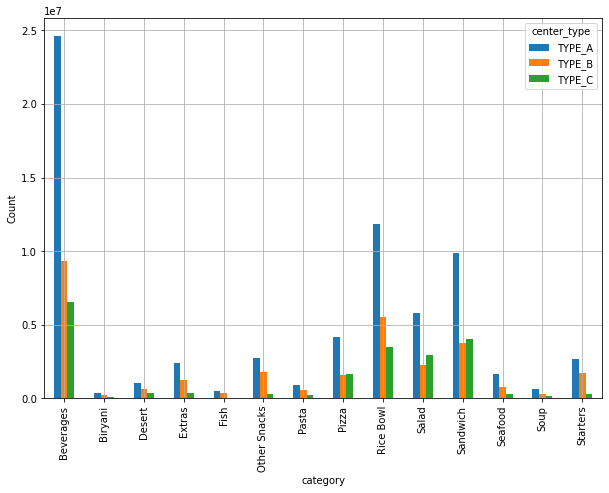

In [49]:
# Visualize this data in bar plot
ax = (cat_ct).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()

In [50]:
cat_cu=df.groupby(['category', 'cuisine'])['num_orders'].sum()
cat_cu = cat_cu.unstack().fillna(0)
cat_cu

cuisine,Continental,Indian,Italian,Thai
category,,,,
Beverages,5943046.0,2345879.0,13953970.0,18237630.0
Biryani,0.0,631848.0,0.0,0.0
Desert,0.0,1940754.0,0.0,0.0
Extras,0.0,0.0,0.0,3984979.0
Fish,871959.0,0.0,0.0,0.0
Other Snacks,0.0,0.0,0.0,4766293.0
Pasta,0.0,0.0,1637744.0,0.0
Pizza,7383720.0,0.0,0.0,0.0
Rice Bowl,0.0,20874063.0,0.0,0.0


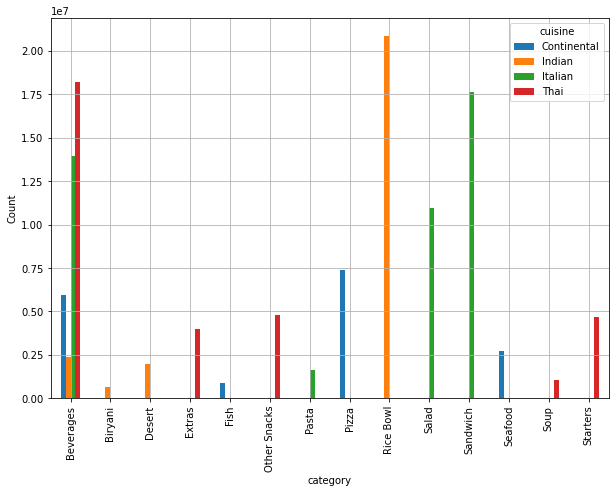

In [51]:
# Visualize this data in bar plot
ax = (cat_cu).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()

In [52]:
ct_cu=df.groupby(['center_type', 'cuisine'])['num_orders'].sum()
ct_cu = ct_cu.unstack().fillna(0)
ct_cu

cuisine,Continental,Indian,Italian,Thai
center_type,,,,
TYPE_A,9874117,14512558,24778761,19813081
TYPE_B,3559456,6944518,9939385,9552714
TYPE_C,3480866,4335468,9454686,3311875


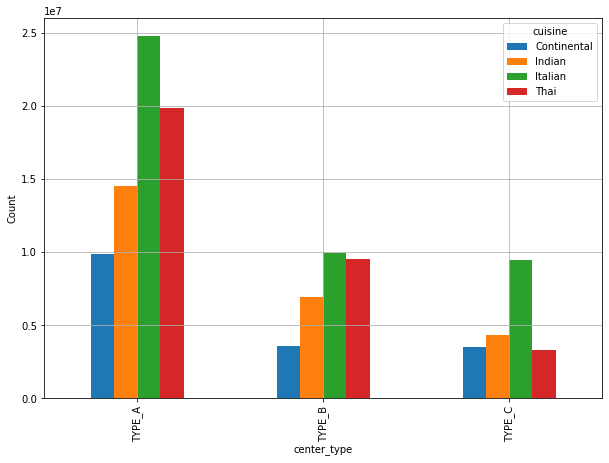

In [53]:
# Visualize this data in bar plot
ax = (ct_cu).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()

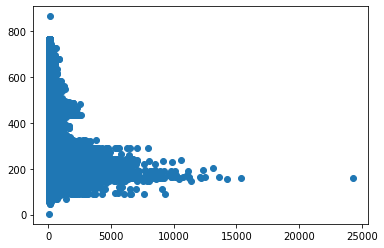

In [54]:
x = df['num_orders']
y = df['checkout_price']

plt.scatter(x, y)
plt.show()

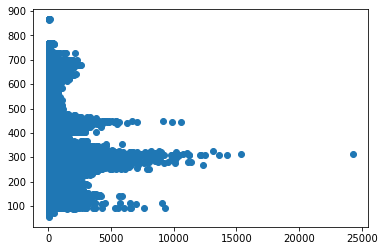

In [55]:
x = df['num_orders']
y = df['base_price']

plt.scatter(x, y)
plt.show()

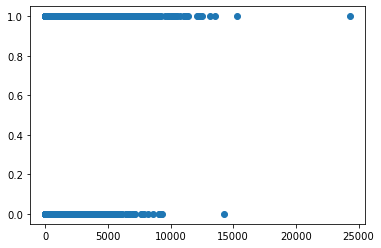

In [56]:
x = df['num_orders']
y = df['emailer_for_promotion']

plt.scatter(x, y)
plt.show()

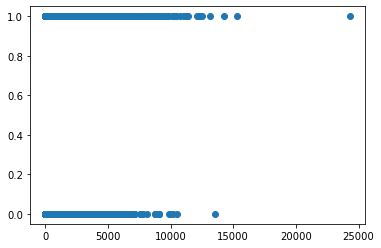

In [57]:
x = df['num_orders']
y = df['homepage_featured']

plt.scatter(x, y)
plt.show()

### Modeling

In [5]:
df_=df.copy()

In [8]:
# Converting Categorical data to numerical

for i in cat_var:
    df_[i] = pd.factorize(df_[i])[0]

In [9]:
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics
%matplotlib inline

In [70]:
df_.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

In [79]:
X = df_.drop(['num_orders'], axis=1).values
y = df_['num_orders'].values

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [63]:
lr = LinearRegression()  
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Root Mean Squared Error for LinearRegression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for LinearRegression: 334.86396888447024


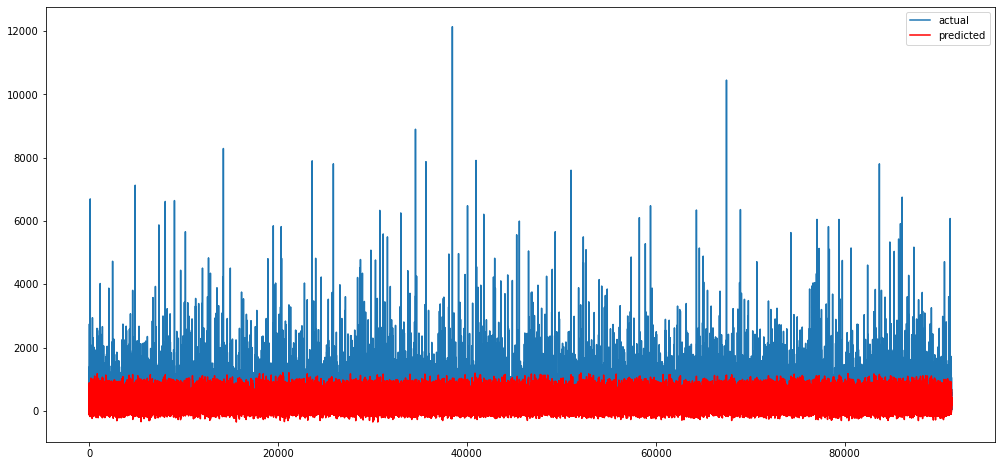

In [64]:
# Understanding the performence of the model by comparing actual and predicted values.

#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

In [65]:
knn = KNeighborsRegressor()  
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Root Mean Squared Error for knn:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for knn: 375.3622586241596


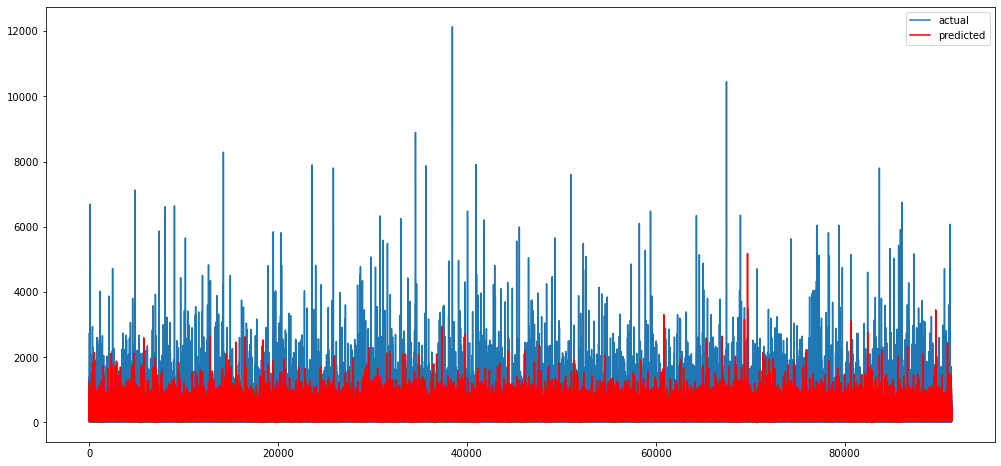

In [66]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

In [67]:
dt = DecisionTreeRegressor()  
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Root Mean Squared Error for DecisionTree:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for DecisionTree: 206.80867945555178


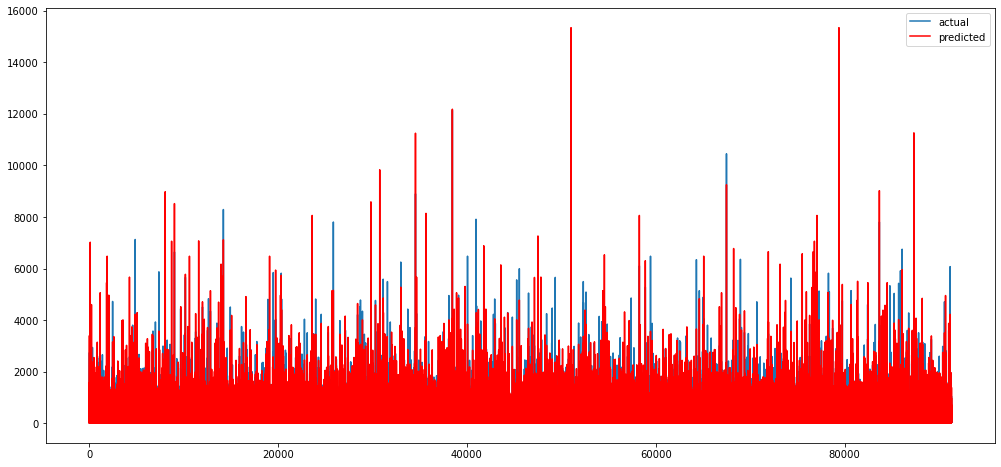

In [68]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

In [12]:
from sklearn.ensemble import RandomForestRegressor 

In [13]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

In [14]:
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [16]:
y_pred = regressor.predict(X_test)

In [17]:
print('Root Mean Squared Error for rf:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for rf: 158.71243890829976


In [18]:
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

In [19]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))

[12:52:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
166.24361858691339


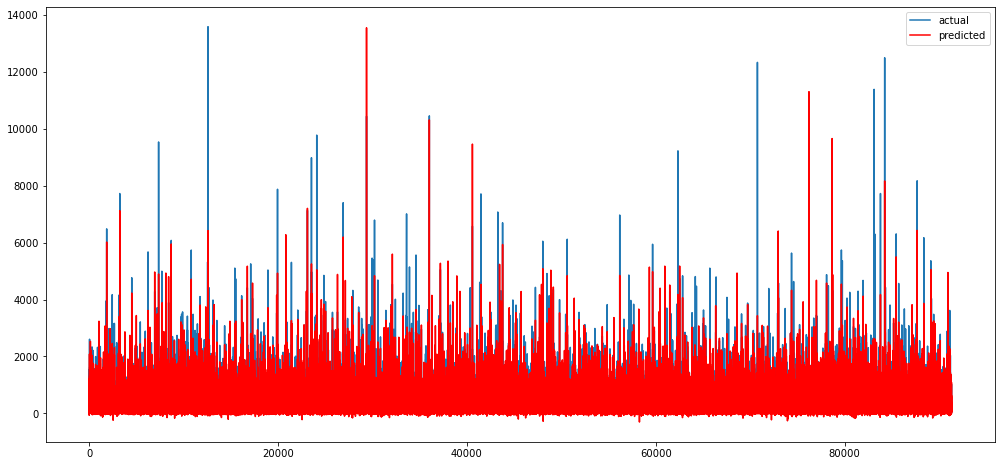

In [20]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='red', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

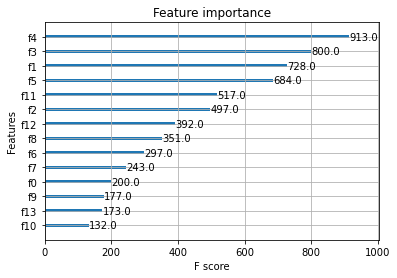

In [29]:
xgb.plot_importance(xgb_model)

In [82]:
training = df.loc[:, ['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders']] 

In [83]:
X_train = training.drop(['num_orders'], axis=1).values
y_train = training['num_orders'].values

In [84]:
X_test = test_data.values

In [85]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

[13:45:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [86]:
ypred = pd.DataFrame(y_pred)

In [87]:
# combining predicted data with test data to form a singe data frame for plotting time series wise.

predictions = pd.merge(test_data, ypred, left_index=True, right_index=True, how='inner')

In [88]:
predictions['num_orders'] = predictions[0]

In [89]:
predictions = predictions.drop([0], axis=1)

In [90]:
ts_tot_pred = predictions.groupby(['week'])['num_orders'].sum()
ts_tot_pred = pd.DataFrame(ts_tot_pred)

In [91]:
import plotly.graph_objs as go
import plotly.offline as pyoff
plot_data = [
    go.Scatter(
        x=ts_tot_orders.index,
        y=ts_tot_orders['num_orders'],
        name='Time Series for num_orders',
        marker = dict(color = 'Blue')
        #x_axis="OTI",
        #y_axis="time",
    ),
    go.Scatter(
        x=ts_tot_pred.index,
        y=ts_tot_pred['num_orders'],
        name='Predicted',
        marker = dict(color = 'Red')
        #x_axis="OTI",
        #y_axis="time",
    )
    
]
plot_layout = go.Layout(
        title='Total orders per week',
        yaxis_title='Total orders',
        xaxis_title='Week',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)